In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the train and test data

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
train_df.head()

,Image,Label
0,r40fgp34fag8uesz98fz.jpg,7
1,fy3h2r5zsea89vcy131g.jpg,4
2,3bxkbk15zjligtg4aymr.jpg,0
3,lygdwa0bio4fitq48n35.jpg,0
4,240le483tt2ebwtuki7d.jpg,0


In [5]:
test_df.head()

,Image,Label
0,kc0yq3aoedc1b0v05gwp.jpg,0
1,udxt71dqhpo3je6alnu3.jpg,0
2,n05xwwbvd8t0k2s6vxim.jpg,0
3,fe2udf0166l7e914798x.jpg,0
4,royn55uoa0oc330cmivt.jpg,0


In [7]:
train_df.Label.value_counts()

Label
4    3719
0    1519
3    1335
7    1236
2    1127
9    1122
8     989
1     719
5     678
6     268
Name: count, dtype: int64

In [8]:
# create train and validation data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df.Image, 
                                                    train_df.Label, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=train_df.Label)

print("Shape of the X_train: ", X_train.shape)
print("Shape of the y_train: ", y_train.shape)
print("Shape of the X_test: ", X_test.shape)
print("Shape of the y_test: ", y_test.shape)

Shape of the X_train:  (8898,)
Shape of the y_train:  (8898,)
Shape of the X_test:  (3814,)
Shape of the y_test:  (3814,)


In [9]:
train_df_concat = pd.concat([X_train, y_train], axis = 1)
valid_df_concat = pd.concat([X_test, y_test], axis = 1)

print(train_df_concat)
print(valid_df_concat)

                          Image  Label
8717   m5ck4bguqh4g2fztahqd.jpg      5
6085   dp4rgofraohw80j4qym6.jpg      3
250    uuq0xmlbkykc4tndpupr.jpg      4
10365  v3pi554xr81yuu3ckrnu.jpg      0
3554   fqcljihfbvj72u0vptk0.jpg      7
...                         ...    ...
4417   q58qs4z5hgddmsw4pwnp.jpg      2
11998  7c66my688bcz5tw5cpq8.jpg      9
2793   zqr8d3m62lk03ijhq13d.jpg      4
773    oo7mq4gwqt9eoxw97q9m.jpg      3
5010   mk2hk6pbnk1m0dwxqlk6.jpg      8

[8898 rows x 2 columns]
                          Image  Label
9476   skey3g1zox7akwnf0tza.jpg      3
10710  2ljlb26p0sjqlfovyd01.jpg      4
3970   bz6p02mhz6syt67pyau0.jpg      4
7514   illk609tl7kz0082al6l.jpg      8
8960   ftkv3jqtic9m0o8p7zx1.jpg      6
...                         ...    ...
11146  hxz9efal5w2sfnoclwa9.jpg      3
12276  tccxpq7o32s5kp3g4f3i.jpg      5
10915  ow4ldjzey5ffm1hx5j3c.jpg      8
3447   2zvlzz9xu47s9jh52qn3.jpg      3
11711  kjlc7g054czhjhlpygne.jpg      4

[3814 rows x 2 columns]


In [12]:
print(train_df_concat.shape)
print(valid_df_concat.shape)

(8898, 2)
(3814, 2)


In [28]:
# Function to convert images to 1D vector
import os
from PIL import Image
from tqdm import tqdm

def function_1dVector(path, dataset):
    myblanklist = []
    for file in tqdm(dataset.Image):
        img = Image.open(os.path.join(path, file)).convert("L")
        im = img.resize((128, 128))
        image_array = np.array(im)
        image_array = 255 - image_array
        normalized_image = image_array / 255.0
        myblanklist.append(normalized_image.flatten())
    
    return myblanklist

In [30]:
train_1dData = function_1dVector('train', train_df_concat)

100%|██████████| 8898/8898 [00:25<00:00, 343.25it/s]


In [31]:
val_1dData = function_1dVector('train', valid_df_concat)

100%|██████████| 3814/3814 [00:06<00:00, 582.49it/s]


In [33]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

# Fit the data into the model
xgb_model.fit(train_1dData,
              y_train,
              eval_set=[(val_1dData, y_test)], 
              eval_metric=['merror', 'mlogloss'])

[0]	validation_0-merror:0.56293	validation_0-mlogloss:2.00008
[1]	validation_0-merror:0.51468	validation_0-mlogloss:1.83579
[2]	validation_0-merror:0.48925	validation_0-mlogloss:1.71748
[3]	validation_0-merror:0.46539	validation_0-mlogloss:1.62708
[4]	validation_0-merror:0.45097	validation_0-mlogloss:1.55761
[5]	validation_0-merror:0.44232	validation_0-mlogloss:1.49679
[6]	validation_0-merror:0.43524	validation_0-mlogloss:1.45152
[7]	validation_0-merror:0.42973	validation_0-mlogloss:1.41293
[8]	validation_0-merror:0.42475	validation_0-mlogloss:1.37587
[9]	validation_0-merror:0.42108	validation_0-mlogloss:1.34519
[10]	validation_0-merror:0.41426	validation_0-mlogloss:1.31750
[11]	validation_0-merror:0.40823	validation_0-mlogloss:1.29102
[12]	validation_0-merror:0.40194	validation_0-mlogloss:1.26838
[13]	validation_0-merror:0.40115	validation_0-mlogloss:1.25024
[14]	validation_0-merror:0.39932	validation_0-mlogloss:1.23229
[15]	validation_0-merror:0.39303	validation_0-mlogloss:1.21387
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [34]:
# Prediction on validation data
valid_data_predict = xgb_model.predict(val_1dData)

In [36]:
# Data sccuracy score for validation
from sklearn.metrics import accuracy_score

print(f"Accuracy for Validation:{accuracy_score(y_test,valid_data_predict).round(2)*100}")

Accuracy for Validation:69.0


In [43]:
final_validation_data = valid_df_concat
final_validation_data['predicted'] = valid_data_predict

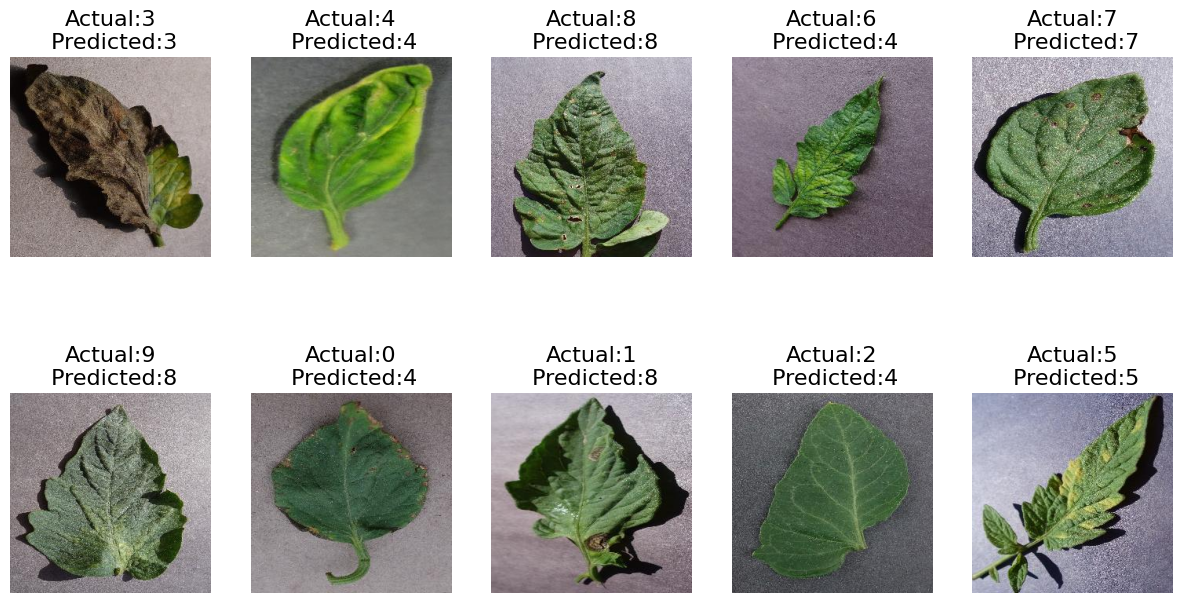

In [44]:
# for showing the images
import matplotlib.pyplot as plt

def reading_images(path,im, new_size=False):
    img = Image.open(f"{(os.path.join(path, im))}")

    if new_size:
        img = img.resize((224, 224))
        return img
    else:
        return img
    

path = 'train'
fig = plt.figure(figsize=(15, 8))
for i, image in enumerate(final_validation_data.groupby('Label').head(1)['Image'].values):
    _=plt.subplot(2, 5, i+1)
    img = reading_images(path, final_validation_data[final_validation_data['Image'] == image]['Image'].head(1).values[0])
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual:{final_validation_data[final_validation_data['Image']==image]['Label'].head(1).values[0]}\n Predicted:{final_validation_data[final_validation_data['Image']==image]['predicted'].head(1).values[0]}",fontsize=16)

In [45]:
# create 1D vector for test data
test_1dData = function_1dVector('test', test_df)

# predict the test data
predict_test_data = xgb_model.predict(test_1dData)
predict_test_data

100%|██████████| 5448/5448 [00:10<00:00, 521.12it/s]


array([7, 4, 0, ..., 0, 4, 4], dtype=int64)

In [46]:
# Generate submission file
submission_file = pd.DataFrame({'Label':predict_test_data})
submission_file.to_csv("submission_file_xgboost.csv", index=False)